In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import geopandas
import plotly.express as px
import os
from geopandas import GeoDataFrame
from shapely.geometry import Point
import matplotlib.pyplot as plt
import imageio
import mapclassify
import matplotlib
import matplotlib.image as mpimg
import ast
import json
import numpy as np
import shapely.wkt
import math

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
import matplotlib
pd.set_option('display.max_columns', None)
from six.moves import reduce
import scipy
from sklearn.metrics import r2_score
#scipy.stats.pearsonr
import scipy.stats as stats
plt.rcParams.update({'font.family': 'Arial'})
import matplotlib.colors as clr
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import TwoSlopeNorm
from sklearn.cluster import *
from sklearn.decomposition import PCA
from functools import reduce
import scipy.stats

import math
import sklearn
import sklearn.feature_extraction.text
from sklearn import cluster
from sklearn import metrics
import sklearn.manifold #For T-SNE
import sklearn.decomposition #For PCA
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.datasets
import sklearn.decomposition
import sklearn.naive_bayes
import sklearn.tree
import sklearn.ensemble
import sklearn.neural_network
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import classification_report
from collections import Counter
from sklearn.metrics import roc_auc_score
from shapely import wkt
#from mycolorpy import colorlist as mcp
import matplotlib.ticker as mtick
from  matplotlib.colors import LinearSegmentedColormap
from functools import reduce
import matplotlib.ticker as plticker
#import cv2
from matplotlib import pyplot as plt
from PIL import Image

In [2]:
variables = ['H_Area_of_store', 
       'R_Percentage_of_Visits_by_brand', 'J_POI_count_where_store_is',
       'K_POI_diversity_where_store_is', 'L_Demographic_similarity',
       'G_Distance_between_cbg_and_store']

In [3]:
vars_definition = {'H_Area_of_store': 'Store area', 
       'R_Percentage_of_Visits_by_brand': 'Chain loyalty', 'J_POI_count_where_store_is': 'POI count',
       'K_POI_diversity_where_store_is': 'POI diversity', 'L_Demographic_similarity': 'Demographic similarity',
       'G_Distance_between_cbg_and_store':'CBG-Store Distance'}

In [4]:
ses = ['med_ageE','bachelor_degree_25E', 'med_hh_incomeE', 'whiteE', 'blackE', 'asianE','hispanicE']

In [5]:
census = pd.read_csv('data/1_data_for_extracting_information/NY_cbg_census.csv').rename(
    columns = {'GEOID':'cbg'})

param_2018 = pd.read_csv(
    'data/3_PSO_results/PSO_calirabtion_results/norm_PSO_combination_2018/PSO_2018_6params_NYC_norm_28_PSO_15.csv')

param_2019 = pd.read_csv(
    'data/3_PSO_results/PSO_calirabtion_results/norm_PSO_combination_2019/PSO_2019_6params_NYC_norm_28_PSO_15.csv')

param_2020 = pd.read_csv(
    'data/3_PSO_results/PSO_calirabtion_results/norm_PSO_combination_2020/PSO_2020_6params_NYC_norm_28_PSO_15.csv')

param_2021 = pd.read_csv(
    'data/3_PSO_results/PSO_calirabtion_results/norm_PSO_combination_2021/PSO_2021_6params_NYC_norm_28_PSO_15.csv')

dfs_hist = {'param_2018': param_2018,'param_2019': param_2019,'param_2020': param_2020, 'param_2021': param_2021}

for k,v in dfs_hist.items():
    v['year']=[int(k.split('_')[-1])]*len(v)
    
params_all = pd.concat([param_2018, param_2019, param_2020, param_2021]).reset_index().drop(columns = 'index')

params_all = params_all[params_all['H_Area_of_store'] != 'no visitors']
params_all[variables] = params_all[variables].astype(float)
#params_all = params_all.merge(census[['cbg']+ses], how = 'inner')

In [6]:
def get_pro(part):
    total_list = census.populationE.tolist()
    part_list = census[part].tolist()
    ans = []
    for i,num in enumerate(total_list):
        if num == 0:
            ans.append(0)
        else:
            ans.append(part_list[i]/num)
    return ans

In [7]:
change = ['bachelor_degree_25E', 'whiteE', 'blackE', 'asianE', 'hispanicE']
for i in change:
    census[i] = get_pro(i)

In [8]:
census

,Unnamed: 0,cbg,NAME,populationE,med_ageE,bachelor_degree_25E,med_hh_incomeE,whiteE,blackE,asianE,hispanicE
0,1,360050245023,"Block Group 3, Census Tract 245.02, Bronx Coun...",1886,28.9,0.042418,30500.0,0.154295,0.239130,0.000000,0.873807
1,2,360050247002,"Block Group 2, Census Tract 247, Bronx County,...",1318,35.4,0.080425,44524.0,0.045524,0.523520,0.004552,0.502276
2,3,360050253004,"Block Group 4, Census Tract 253, Bronx County,...",1222,26.6,0.044190,36250.0,0.094108,0.036825,0.000000,0.945172
3,4,360050263005,"Block Group 5, Census Tract 263, Bronx County,...",1941,63.8,0.156620,12351.0,0.311180,0.220505,0.000000,0.459042
4,5,360050265004,"Block Group 4, Census Tract 265, Bronx County,...",1191,28.2,0.073048,38099.0,0.028547,0.223342,0.073887,0.748950
...,...,...,...,...,...,...,...,...,...,...,...
15458,15459,360010129001,"Block Group 1, Census Tract 129, Albany County...",1328,28.4,0.095633,53125.0,0.803464,0.013554,0.000000,0.010542
15459,15460,360010146082,"Block Group 2, Census Tract 146.08, Albany Cou...",1686,51.9,0.269870,79457.0,0.824437,0.065836,0.078885,0.054567
15460,15461,360010146141,"Block Group 1, Census Tract 146.14, Albany Cou...",935,50.3,0.479144,185435.0,0.918717,0.000000,0.081283,0.000000
15461,15462,360010146144,"Block Group 4, Census Tract 146.14, Albany Cou...",1908,43.7,0.385220,71932.0,0.872642,0.022013,0.079665,0.034067


In [9]:
params_all = params_all.merge(census[['cbg']+ses], how = 'inner').dropna()

In [10]:
params_all['year'].value_counts()

2018    5185
2019    5185
2020    5185
2021    5185
Name: year, dtype: int64

In [11]:
params_all

,cbg,cost,H_Area_of_store,R_Percentage_of_Visits_by_brand,J_POI_count_where_store_is,K_POI_diversity_where_store_is,L_Demographic_similarity,G_Distance_between_cbg_and_store,year,med_ageE,bachelor_degree_25E,med_hh_incomeE,whiteE,blackE,asianE,hispanicE
0,360050359001,0.032869,5.246015,2.696207,3.122337,9.002946,13.590317,14.482521,2018,37.2,0.033924,25490.0,0.126582,0.255696,0.023797,0.780759
1,360050359001,0.068463,3.006695,1.494385,1.419485,3.797733,4.733461,13.782162,2019,37.2,0.033924,25490.0,0.126582,0.255696,0.023797,0.780759
2,360050359001,0.119249,5.788361,5.957322,4.922220,7.013178,12.599721,13.700481,2020,37.2,0.033924,25490.0,0.126582,0.255696,0.023797,0.780759
3,360050359001,0.837903,13.512518,4.192778,6.233125,3.466252,5.418156,8.299138,2021,37.2,0.033924,25490.0,0.126582,0.255696,0.023797,0.780759
4,360050167001,0.677226,3.484115,6.865978,3.043939,5.076393,5.885937,13.818760,2018,34.9,0.112130,44095.0,0.089704,0.583078,0.000000,0.489297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22003,360610124002,0.944813,4.089323,6.683310,1.269403,4.336994,7.101265,3.290888,2021,39.2,0.732729,107237.0,0.958097,0.000000,0.041903,0.050396
22004,360610228002,0.470169,1.151588,9.769511,12.402370,10.160422,3.381118,13.904175,2018,30.4,0.161426,19399.0,0.111111,0.763802,0.029350,0.160727
22005,360610228002,0.222091,1.066812,1.594506,6.323780,9.946103,13.704003,10.789332,2019,30.4,0.161426,19399.0,0.111111,0.763802,0.029350,0.160727
22006,360610228002,0.846188,14.592542,14.332341,14.795688,11.045524,11.267600,3.913227,2020,30.4,0.161426,19399.0,0.111111,0.763802,0.029350,0.160727


In [19]:
census_top_stats = params_all[params_all['year'] == 2018].quantile(0.95)[ses].to_dict()
for k,v in census_top_stats.items():
    census_top_stats[k] = round(v, 2)
census_top_stats

{'med_ageE': 52.88,
 'bachelor_degree_25E': 0.67,
 'med_hh_incomeE': 144069.2,
 'whiteE': 0.92,
 'blackE': 0.89,
 'asianE': 0.55,
 'hispanicE': 0.78}

## Change ratio

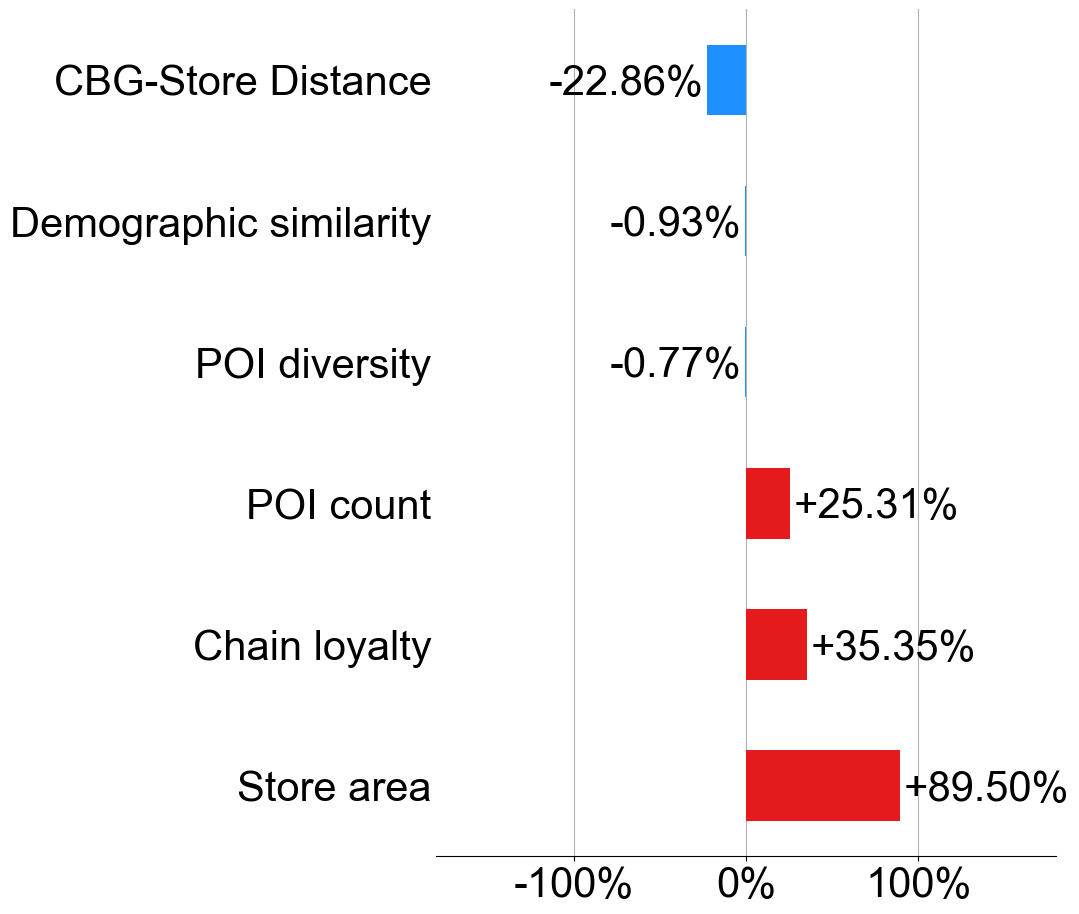

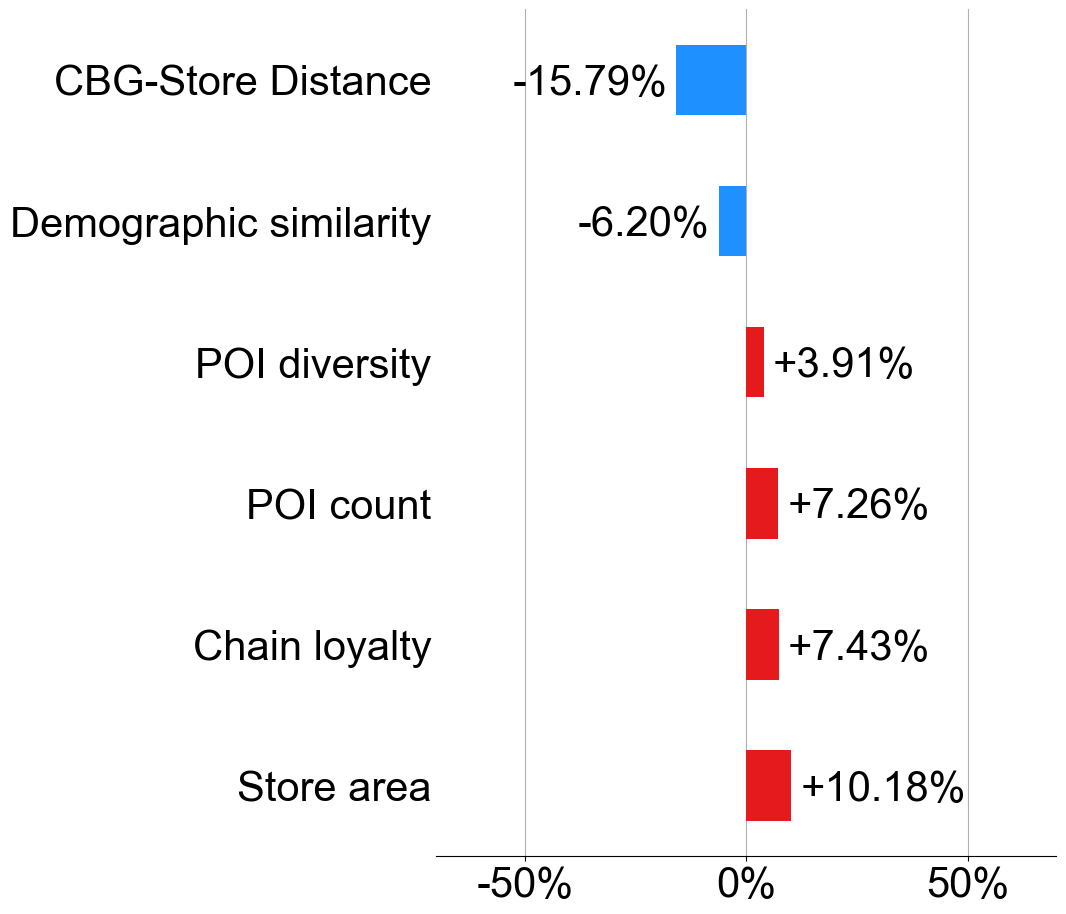

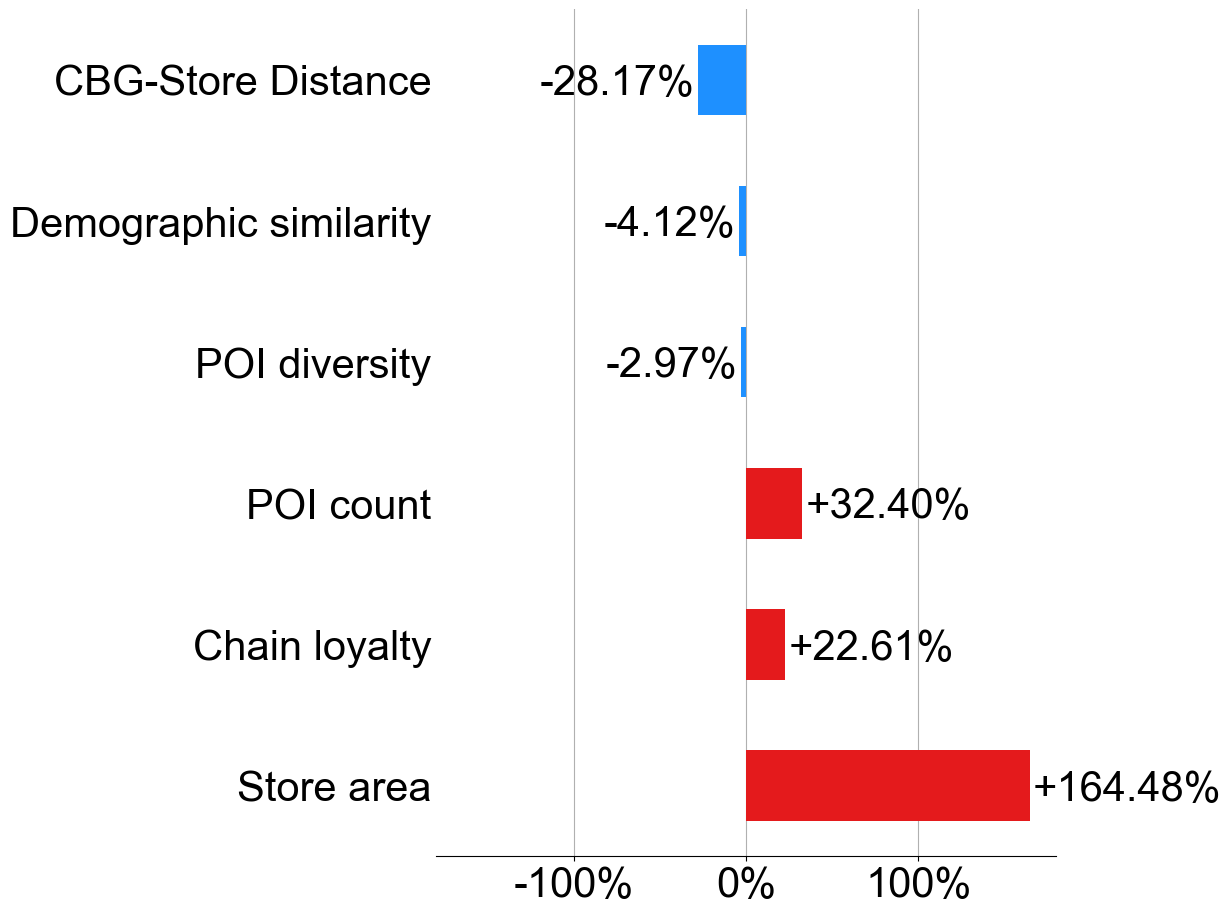

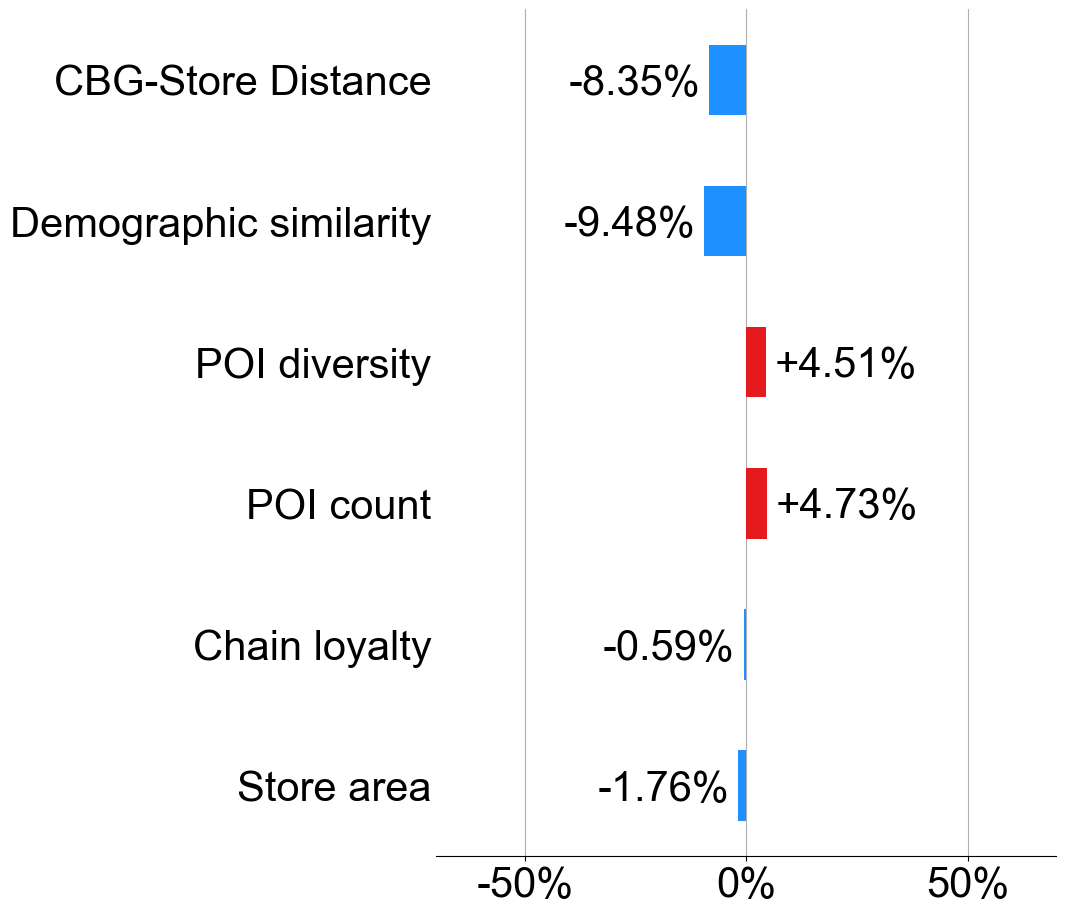

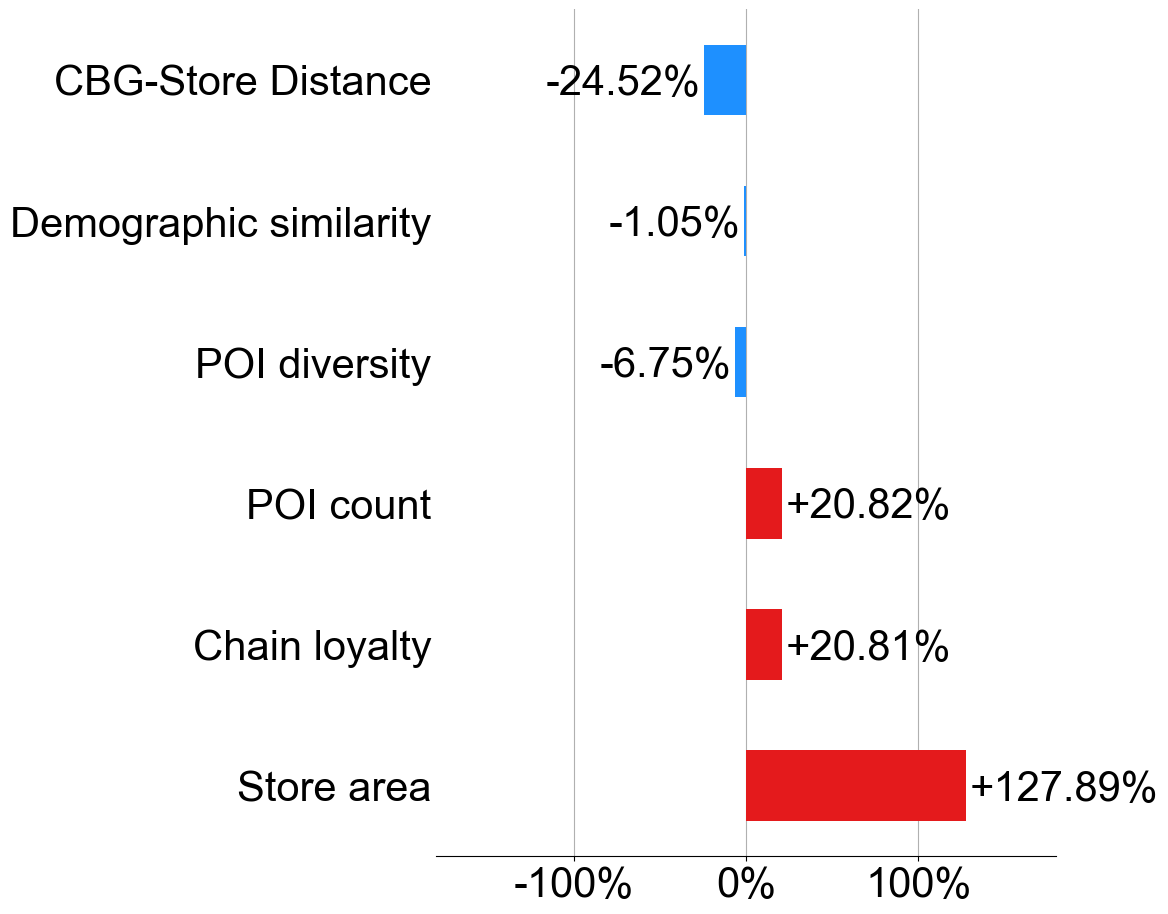

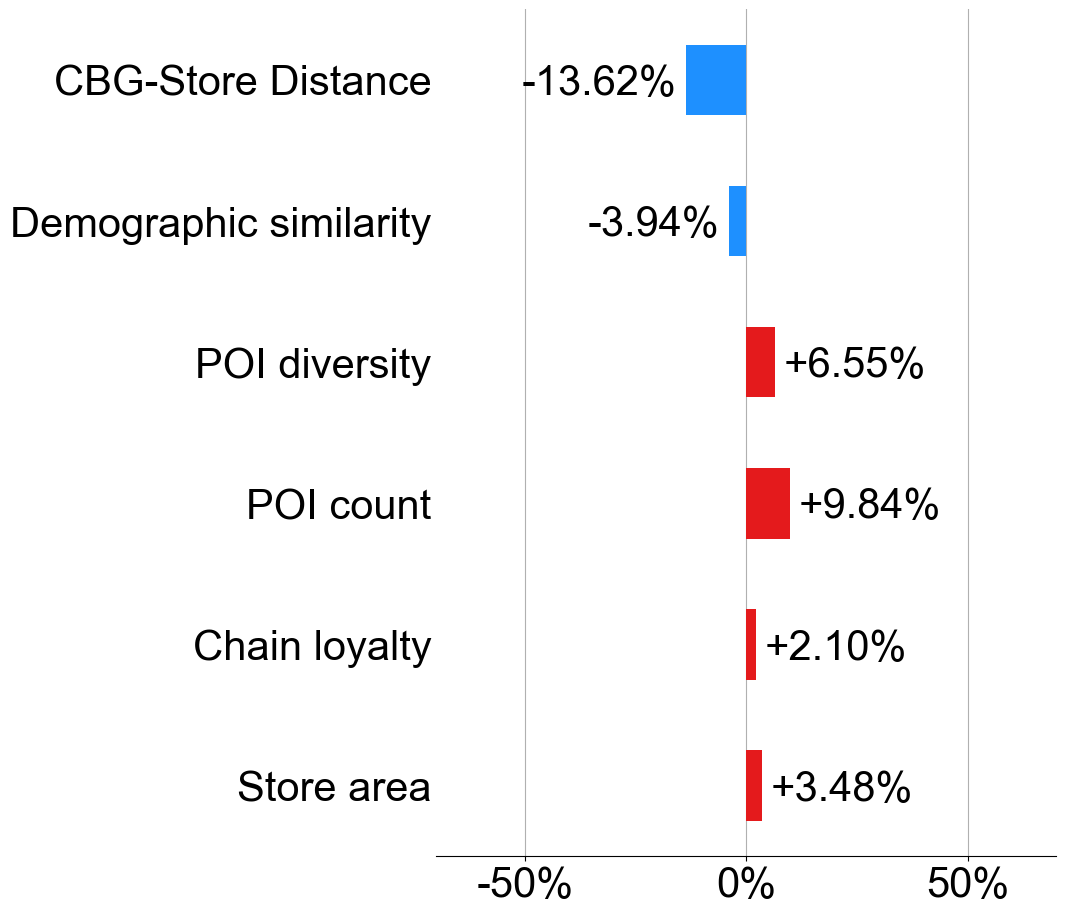

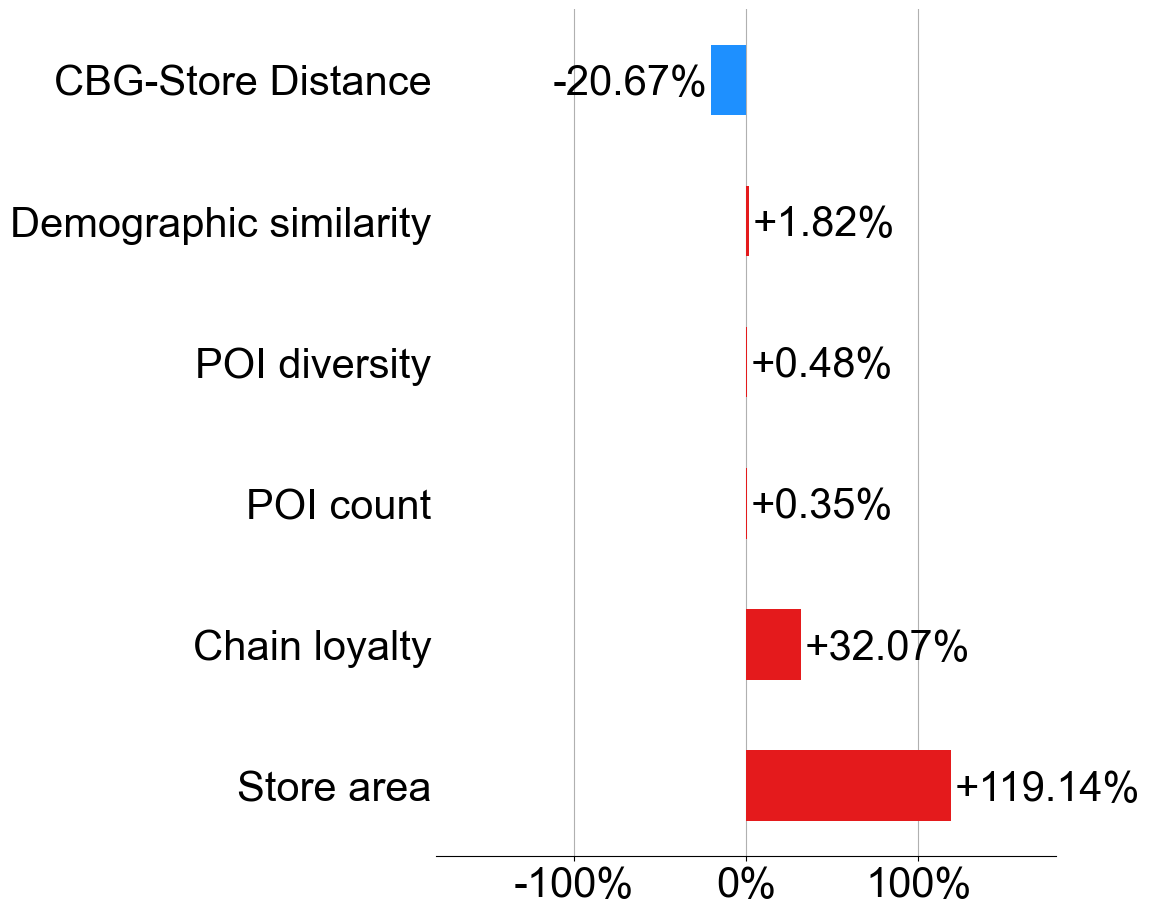

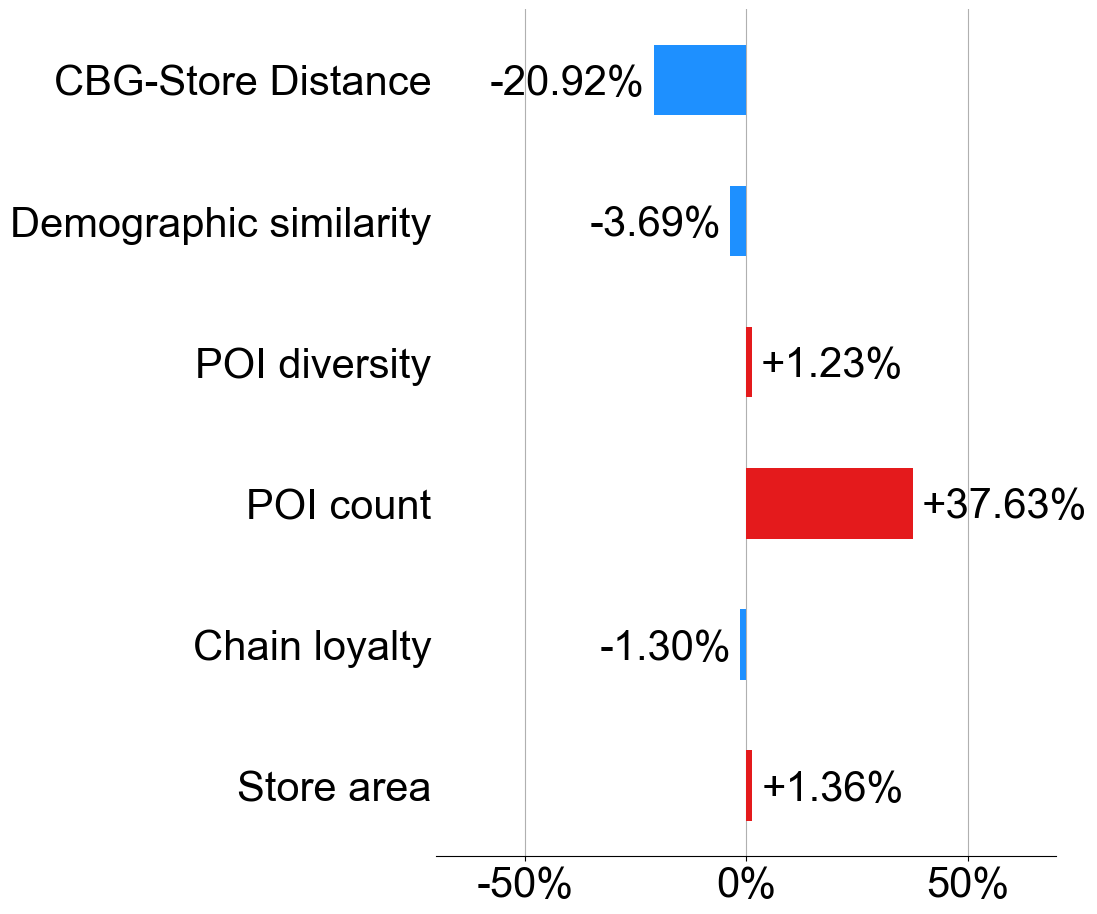

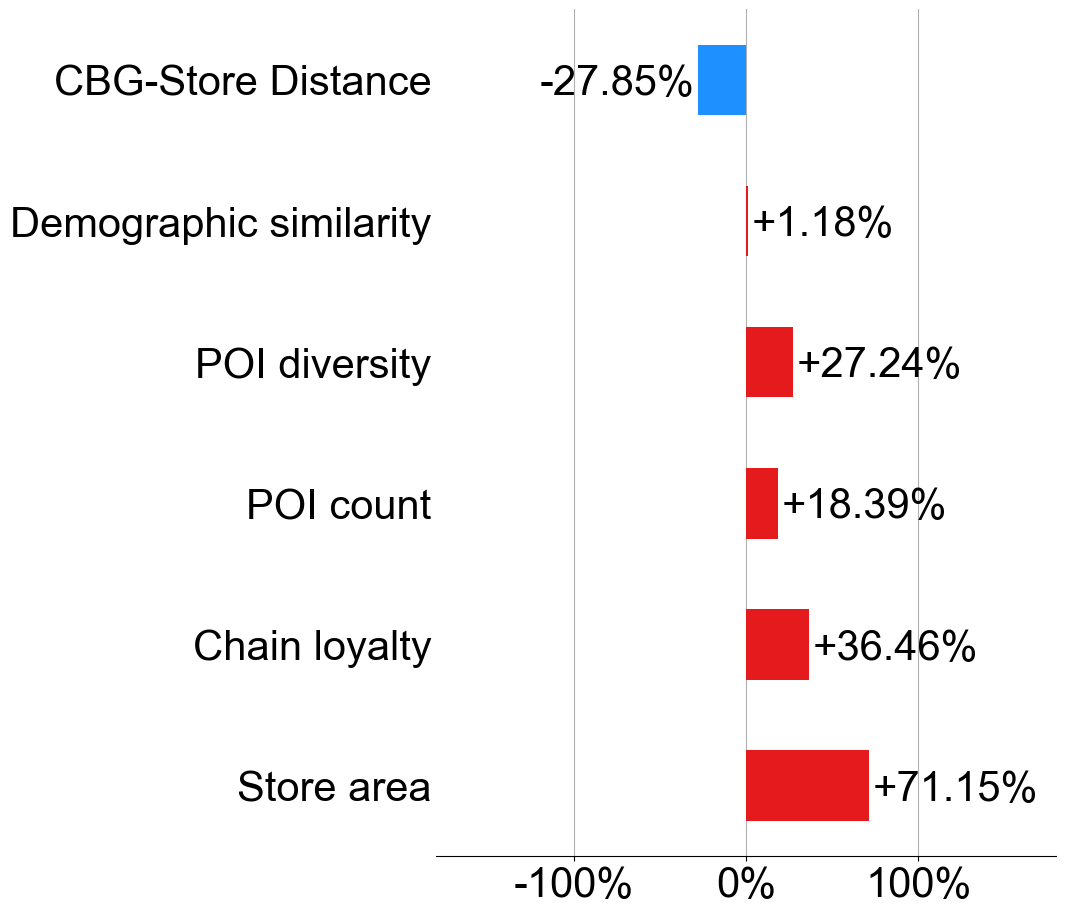

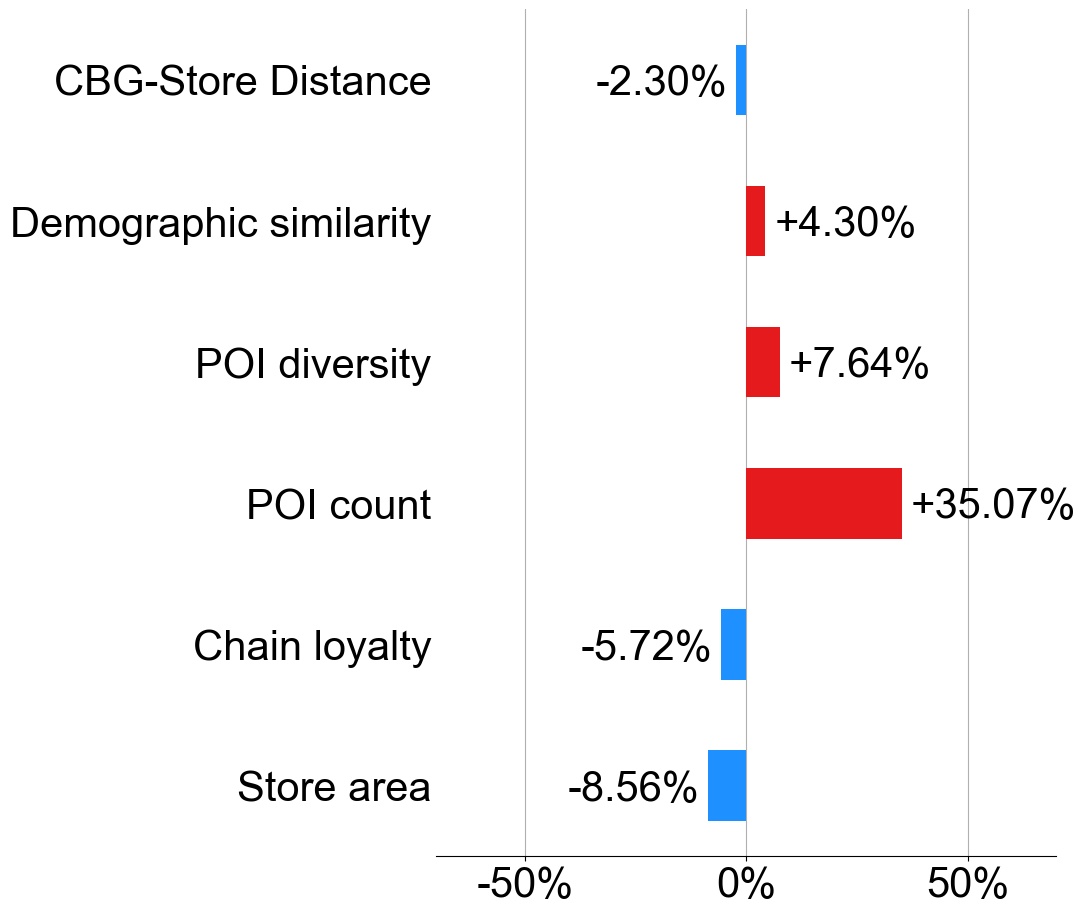

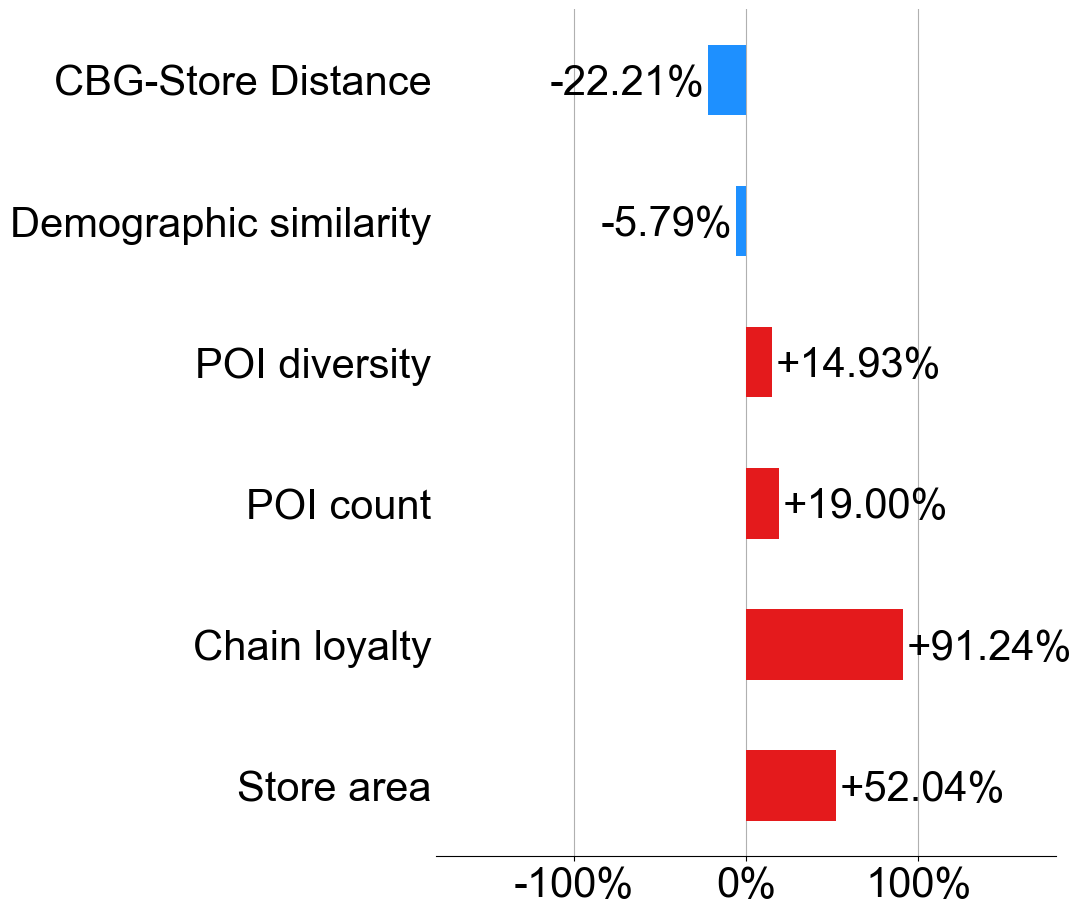

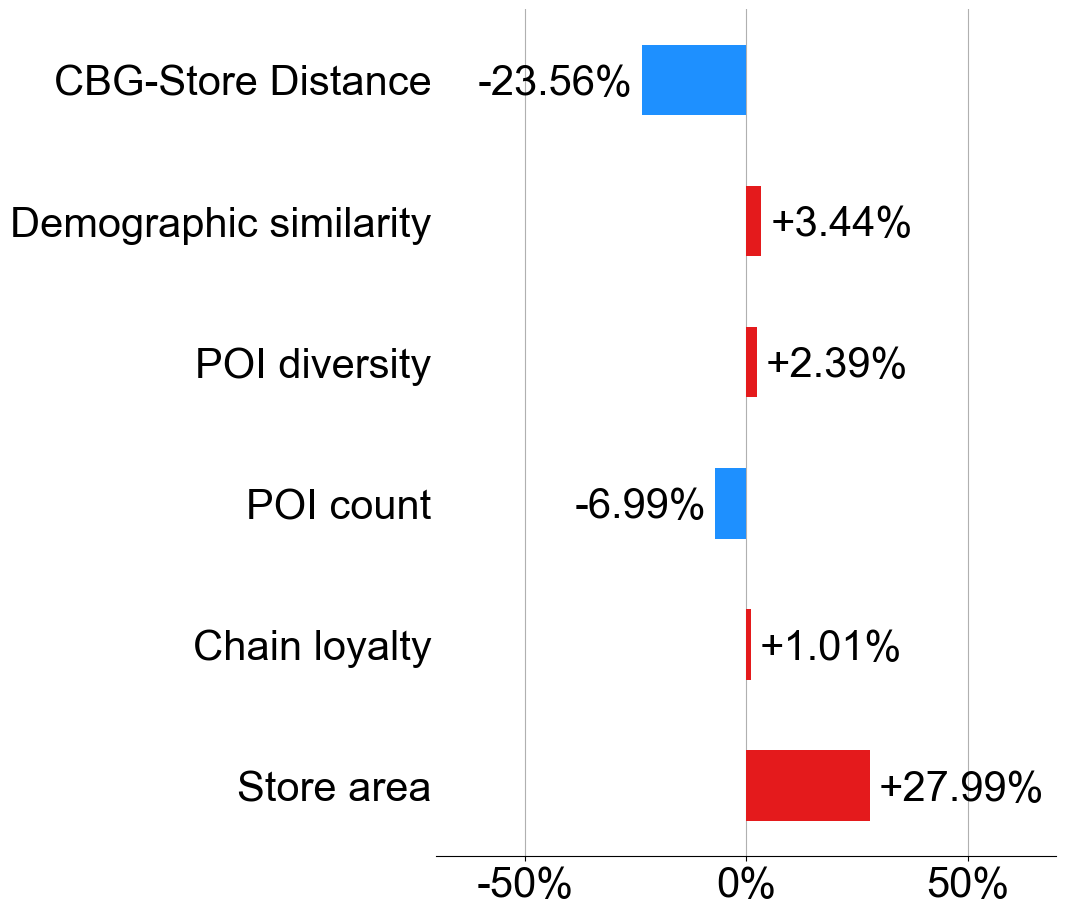

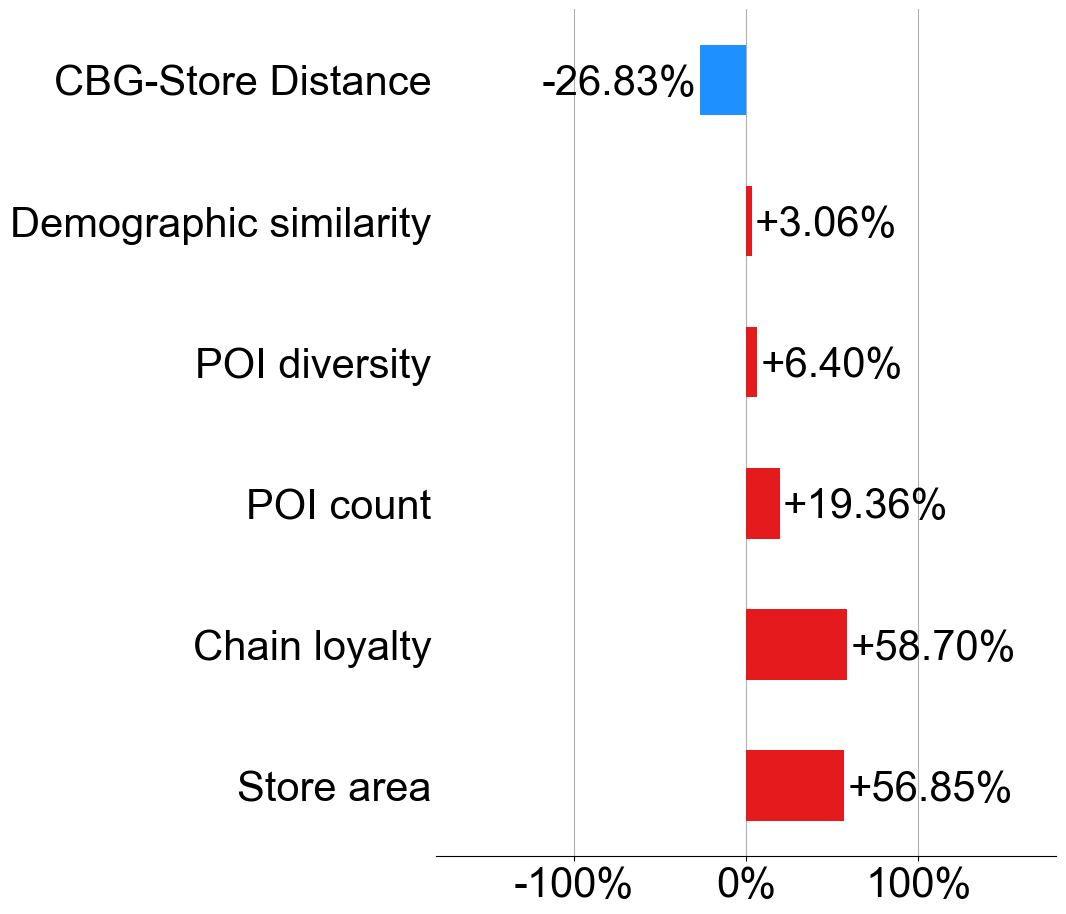

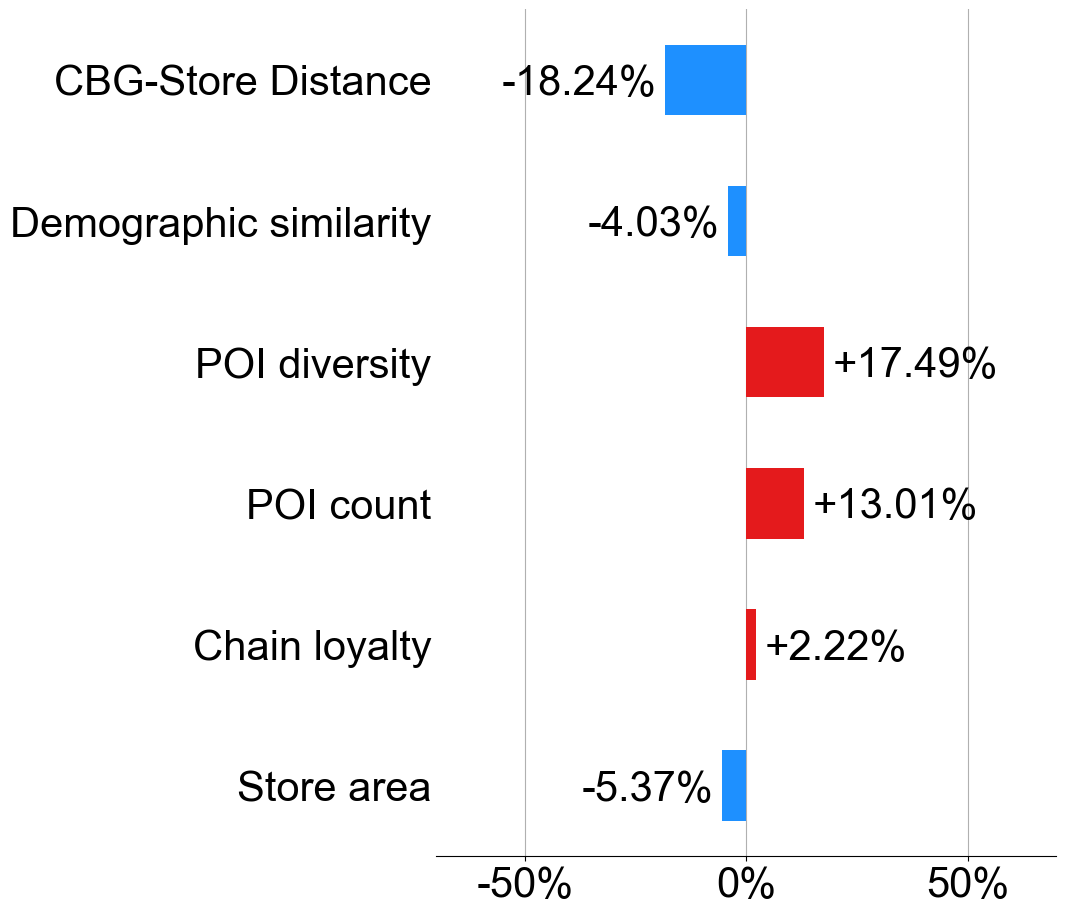

In [20]:
def get_top_ses_param_change_over_year(ses_var, prop, start_year, end_year):

    start_cbgs = params_all[params_all['year'] == start_year]['cbg'].unique().tolist()
    end_cbgs = params_all[params_all['year'] == end_year]['cbg'].unique().tolist()
    d_temp = params_all[(params_all['cbg'].isin(start_cbgs)) & (params_all['cbg'].isin(end_cbgs))]
    
    census_temp = census[(census['cbg'].isin(start_cbgs)) & (census['cbg'].isin(end_cbgs))]

    
    d_temp = d_temp[d_temp['cbg'].isin(census_temp.nlargest(int(len(census_temp)*prop), ses_var)['cbg'].tolist())]

    threshold_here = round(min(d_temp[ses_var]),3)
    
    d_here_start = d_temp[d_temp['year'] == start_year][[i for i in variables]].mean().reset_index().rename(
        columns = {'index': 'Variable', 0: 'Mean_start_year'})
    d_here_end = d_temp[d_temp['year'] == end_year][[i for i in variables]].mean().reset_index().rename(
        columns = {'index': 'Variable', 0: 'Mean_end_year'})
    
    d_here = d_here_start.merge(d_here_end, on = 'Variable')

    d_here['Feature'] = d_here['Variable'].apply(lambda x: vars_definition[x.replace('_delta','')])

    d_here['positive'] = (d_here['Mean_end_year'] -  d_here['Mean_start_year'])> 0
    d_here['percent'] = (d_here['Mean_end_year'] -  d_here['Mean_start_year'])/d_here['Mean_start_year']

    ax = d_here.plot.barh(x='Feature', y='percent', 
                          color=d_here.positive.map({True: '#e41a1c', False: 'dodgerblue'}),
                    
                          figsize=(8,11),
                    legend=False,align='center')
    title_here = ses_var + " (Top " + "{0:.0%}".format(prop) + ', at least ' + str(threshold_here) +')'
    

    
    if start_year == 2019 and end_year == 2020:
        axis_upper = 1.8
        axis_lower = -1.8
        loc = plticker.MultipleLocator(base=1) 
        ax.xaxis.set_major_locator(loc)
        
    if start_year == 2020 and end_year == 2021:
        axis_upper = 0.7
        axis_lower = -0.7
        loc = plticker.MultipleLocator(base=0.5)
        ax.xaxis.set_major_locator(loc)
        
    for idx, (f, v, p) in d_here[['Feature', 'Variable', 'percent']].iterrows():
        if p >= 0:
            plt.annotate("{:+.2%}".format(p) +'\n', xy=(p+0.02, idx-0.18), ha='left', va='center',size=30)
        else: 
            if start_year == 2019 and end_year == 2020:
                plt.annotate("{:+.2%}".format(p) +'\n', xy=(
                    p-0.02, idx-0.18), ha ='right', va='center', size = 30)
            else:
                plt.annotate("{:+.2%}".format(p) +'\n', xy=(
                    p-0.02, idx-0.18), ha='right', va='center', size = 30)
            
    plt.xticks(rotation = 0, size=30)
    plt.yticks(size=30)

    plt.xlim(axis_lower, axis_upper)
    #ax.set_axis_off()
    plt.ylabel('Feature', size = 30)
    plt.gca().set_xticklabels(['{:.0%}'.format(x) for x in plt.gca().get_xticks()])
    

    plt.grid(axis = 'x')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    #ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_axisbelow(True)
    ax.yaxis.set_tick_params(length=0)
    plt.ylabel(None)

    
    plt.savefig(str(start_year)+ '_' + str(end_year) + '/' + ses_var + ' (Top_' + str(
            start_year) + '_' + str(end_year) + ').jpg', 
                dpi=300, bbox_inches='tight')
    
    
    plt.show()
for s in ses:
    get_top_ses_param_change_over_year(s, 0.05, 2019, 2020)
    get_top_ses_param_change_over_year(s, 0.05, 2020, 2021)

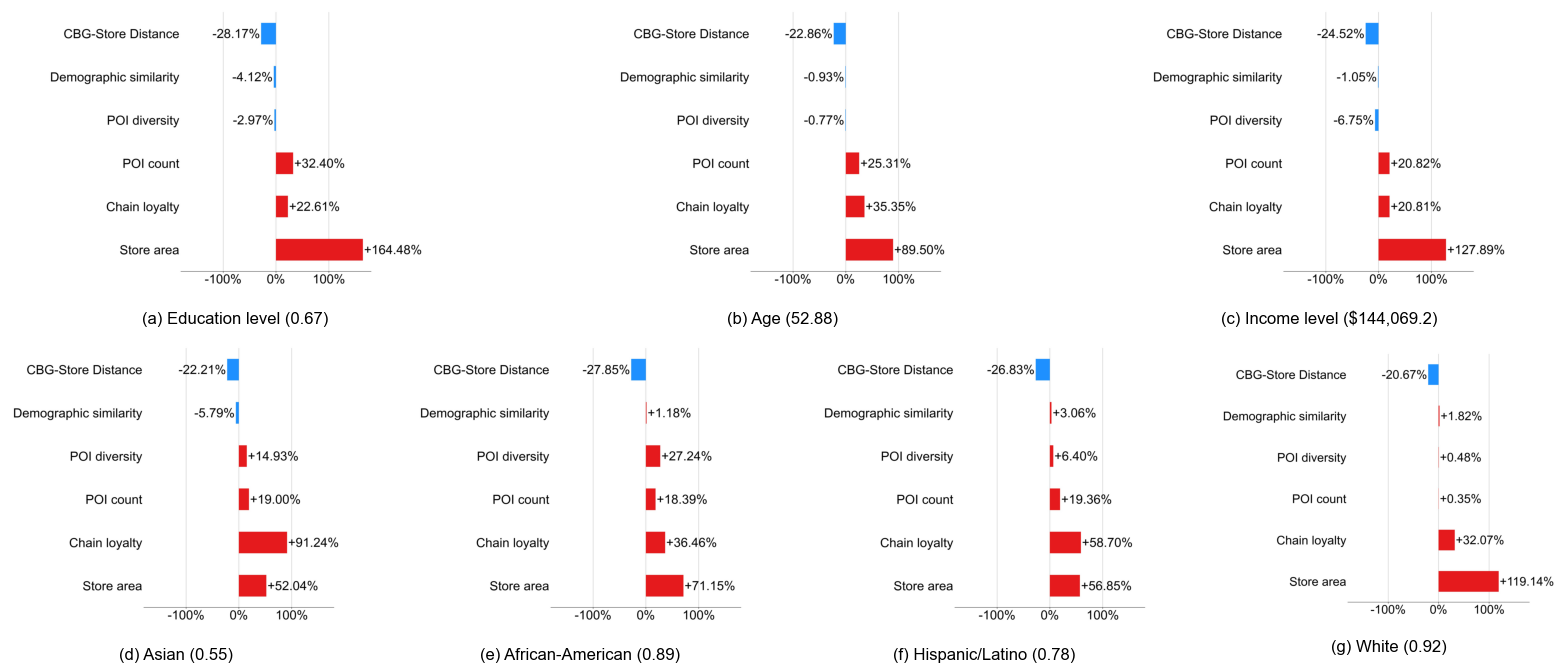

In [24]:
Image1 = Image.open(
    '2019_2020/bachelor_degree_25E (Top_2019_2020).jpg')
Image2 = Image.open(
    '2019_2020/med_ageE (Top_2019_2020).jpg')
Image3 = Image.open(
    '2019_2020/med_hh_incomeE (Top_2019_2020).jpg')
Image4 = Image.open(
    '2019_2020/asianE (Top_2019_2020).jpg')
Image5 = Image.open(
    '2019_2020/blackE (Top_2019_2020).jpg')
Image6 = Image.open(
    '2019_2020/hispanicE (Top_2019_2020).jpg')
Image7 = Image.open(
    '2019_2020/whiteE (Top_2019_2020).jpg')
fig = plt.figure(figsize=(20, 8))

# Adds a subplot at the 1st position
fig.add_subplot(2, 3, 1)
  
# showing image
plt.imshow(Image1)
plt.axis('off')
plt.title("(a) Education level ("+str(census_top_stats['bachelor_degree_25E'])+')', y=-0.15)
  
# Adds a subplot at the 2nd position
fig.add_subplot(2, 3, 2)
  
# showing image
plt.imshow(Image2)
plt.axis('off')
plt.title("(b) Age ("+str(census_top_stats['med_ageE'])+')', y=-0.15)
  
# Adds a subplot at the 3rd position
fig.add_subplot(2, 3, 3)
  
# showing image
plt.imshow(Image3)
plt.axis('off')
plt.title("(c) Income level ($"+str('{:,}'.format(census_top_stats['med_hh_incomeE']))+')', y=-0.15)
  
# Adds a subplot at the 4th position
fig.add_subplot(2, 4, 5)
  
# showing image
plt.imshow(Image4)
plt.axis('off')
plt.title("(d) Asian ("+str(census_top_stats['asianE'])+')', y=-0.15)

# # Adds a subplot at the 5th position
fig.add_subplot(2, 4, 6)
  
# showing image
plt.imshow(Image5)
plt.axis('off')
plt.title("(e) African-American ("+str(census_top_stats['blackE'])+')', y=-0.15)

# Adds a subplot at the 6th position
fig.add_subplot(2, 4, 7)
  
# showing image
plt.imshow(Image6)
plt.axis('off')
plt.title("(f) Hispanic/Latino ("+str(census_top_stats['hispanicE'])+')', y=-0.15)

# Adds a subplot at the 7th position
fig.add_subplot(2, 4, 8)
  
# showing image
plt.imshow(Image7)
plt.axis('off')
plt.title("(g) White ("+str(census_top_stats['whiteE'])+')', y=-0.15)

plt.savefig(
        'top_ses_cluster_param_change_combination_2020.jpg', 
                dpi=300, bbox_inches='tight')
plt.show()

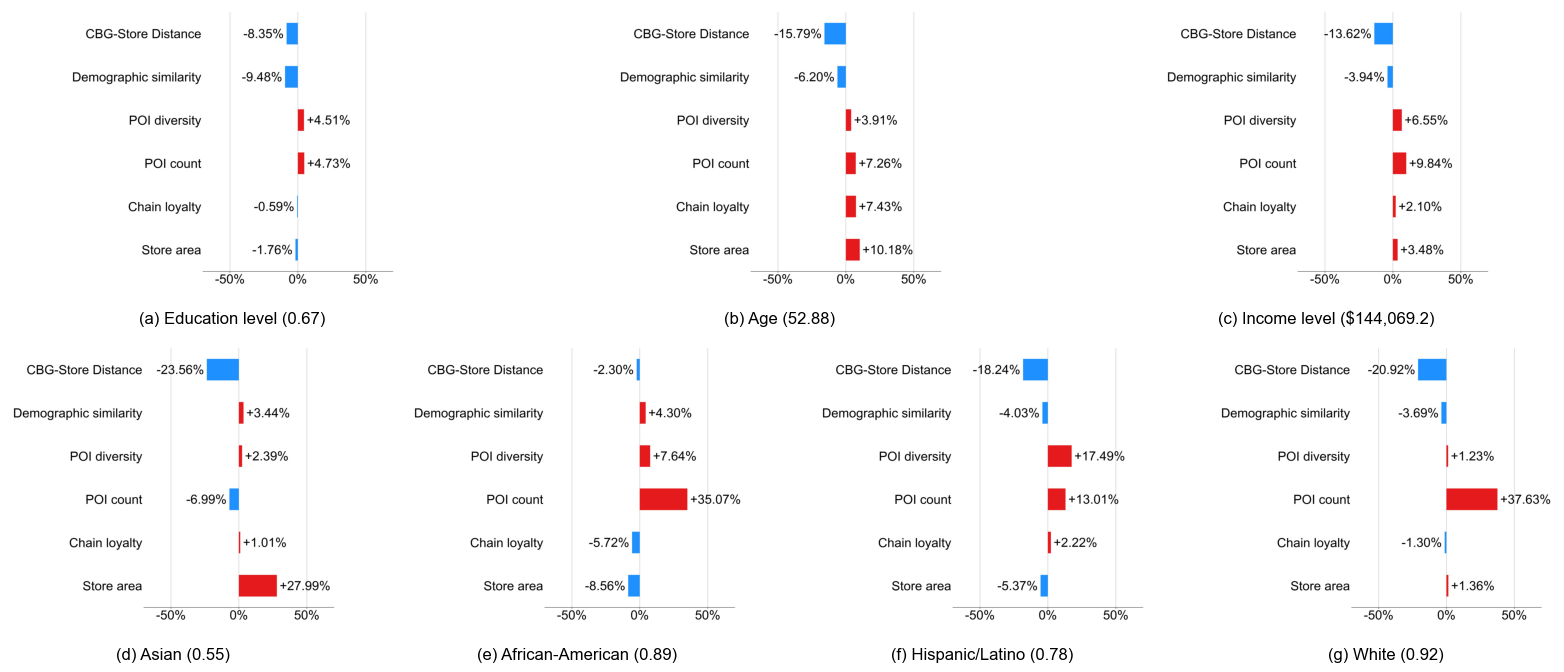

In [25]:
Image1 = Image.open(
    '2020_2021/bachelor_degree_25E (Top_2020_2021).jpg')
Image2 = Image.open(
    '2020_2021/med_ageE (Top_2020_2021).jpg')
Image3 = Image.open(
    '2020_2021/med_hh_incomeE (Top_2020_2021).jpg')
Image4 = Image.open(
    '2020_2021/asianE (Top_2020_2021).jpg')
Image5 = Image.open(
    '2020_2021/blackE (Top_2020_2021).jpg')
Image6 = Image.open(
    '2020_2021/hispanicE (Top_2020_2021).jpg')
Image7 = Image.open(
    '2020_2021/whiteE (Top_2020_2021).jpg')
fig = plt.figure(figsize=(20, 8))


# Adds a subplot at the 1st position
fig.add_subplot(2, 3, 1)
  
# showing image
plt.imshow(Image1)
plt.axis('off')
plt.title("(a) Education level ("+str(census_top_stats['bachelor_degree_25E'])+')', y=-0.15)
  
# Adds a subplot at the 2nd position
fig.add_subplot(2, 3, 2)
  
# showing image
plt.imshow(Image2)
plt.axis('off')
plt.title("(b) Age ("+str(census_top_stats['med_ageE'])+')', y=-0.15)
  
# Adds a subplot at the 3rd position
fig.add_subplot(2, 3, 3)
  
# showing image
plt.imshow(Image3)
plt.axis('off')
plt.title("(c) Income level ($"+str('{:,}'.format(census_top_stats['med_hh_incomeE']))+')', y=-0.15)
  
# Adds a subplot at the 4th position
fig.add_subplot(2, 4, 5)
  
# showing image
plt.imshow(Image4)
plt.axis('off')
plt.title("(d) Asian ("+str(census_top_stats['asianE'])+')', y=-0.15)

# # Adds a subplot at the 5th position
fig.add_subplot(2, 4, 6)
  
# showing image
plt.imshow(Image5)
plt.axis('off')
plt.title("(e) African-American ("+str(census_top_stats['blackE'])+')', y=-0.15)

# Adds a subplot at the 6th position
fig.add_subplot(2, 4, 7)
  
# showing image
plt.imshow(Image6)
plt.axis('off')
plt.title("(f) Hispanic/Latino ("+str(census_top_stats['hispanicE'])+')', y=-0.15)

# Adds a subplot at the 7th position
fig.add_subplot(2, 4, 8)
  
# showing image
plt.imshow(Image7)
plt.axis('off')
plt.title("(g) White ("+str(census_top_stats['whiteE'])+')', y=-0.15)

plt.savefig(
        'top_ses_cluster_param_change_combination_2021.jpg', 
                dpi=300, bbox_inches='tight')
plt.show()